### Student Details

Student name: Aryank Gupta

Student ID: 24101613

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [2]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [4]:
################################
# Class stub for you to fill the rest of the code
class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
      self.w_ = np.zeros(1 + X.shape[1])
      self.cost_ = []

      for i in range(self.epochs):
        z = self.net_input(X)
        output = self.activation(z)
        errors  = y-output

        self.w_[1:] += self.eta * X.T.dot(errors)
        self.w_[0] += self.eta * errors.sum()

        output = np.clip(output, 1e-15, 1 - 1e-15)
        cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
        self.cost_.append(cost)
      return self

    def net_input(self, X):
      return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
      z = np.clip(z,-250,250)
      return 1.0/(1.0+np.exp(-z))


    def predict(self, X):
      return np.where(self.activation(self.net_input(X)) >= 0.5 , 1,0)


In [5]:
import sys
sys.path.append('/content/plot_decision_boundary.py')

accuracy score : 1.0


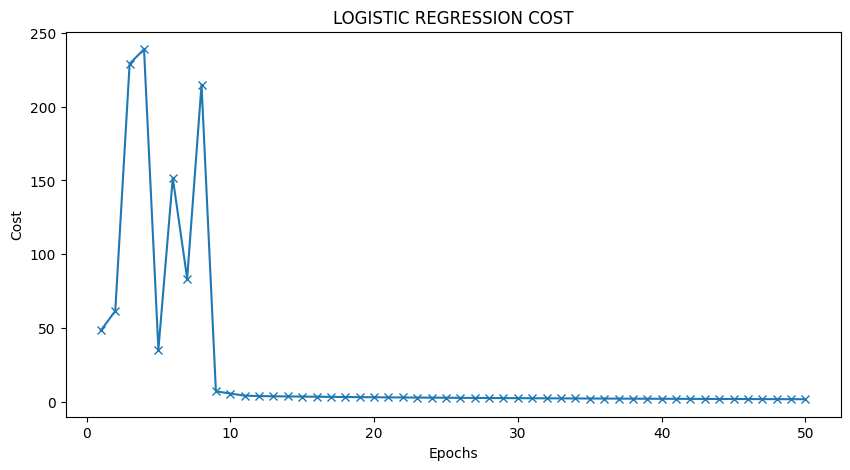

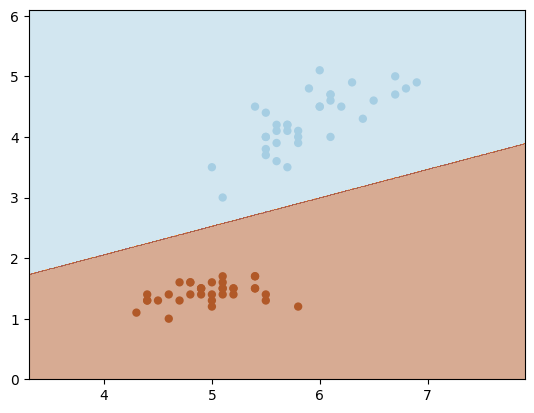

----------------------ADALINE GD-------------------------------
Logistic Regression Accuracy: 1.0


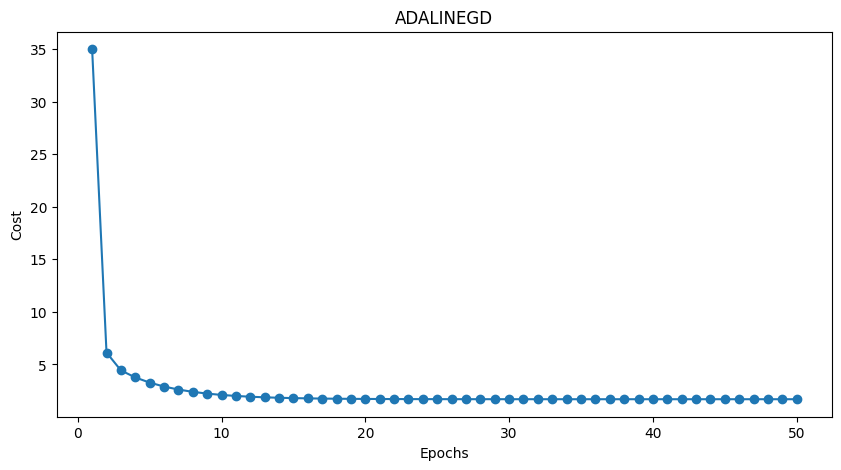

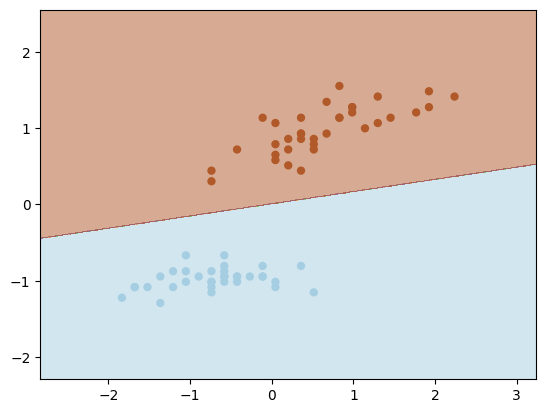

In [26]:
from plot_decision_boundary import plot_decision_boundary
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Code

df = pd.read_csv('/content/iris_data.csv')

df= df.rename(columns = lambda x : x.strip())

df_filtered = df.loc[(df['class'] == 'Iris-setosa') | (df['class'] == 'Iris-versicolor')]

features = df_filtered.iloc[: , [0,2]].values
labels = df_filtered.iloc[: , 4].values



#logistic regression;

def logistic_regression(features,labels):
  labels_binary= np.where(labels == "Iris-setosa" , 1 , 0)
  X_train, X_test, y_train, y_test = train_test_split(features, labels_binary, test_size=0.3, random_state=1, stratify=labels_binary)

  model = LogisticRegressionGD(eta=0.01, epochs=50)
  model.train(X_train, y_train)
  y_pred = model.predict(X_test)
  print("accuracy score :",accuracy_score(y_test, y_pred))
  plt.figure(figsize=(10,5))
  plt.plot(range(1,len(model.cost_)+1) , model.cost_ , marker = 'x')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title("LOGISTIC REGRESSION COST")
  plot_decision_boundary(X_train, y_train, model)
  plt.show()

#ada

def adaline_GD(features,labels):
  scaler = StandardScaler()
  features_scaled = scaler.fit_transform(features)
  labels_adaline = np.where(labels == "Iris-setosa", -1, 1)
  X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_adaline, test_size=0.3, random_state=1, stratify=labels_adaline)

  ada_model = AdalineGD(eta=0.01, epochs=50)
  ada_model.train(X_train, y_train)
  y_pred_log= ada_model.predict(X_test)
  print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
  plt.figure(figsize=(10,5))
  plt.plot(range(1, len(ada_model.cost_) + 1), ada_model.cost_, marker='o')
  plt.xlabel("Epochs")
  plt.ylabel("Cost")
  plt.title("ADALINEGD")
  plt.show()
  plot_decision_boundary(X_train, y_train, ada_model)



logistic_regression(features, labels)

print("----------------------ADALINE GD-------------------------------")
adaline_GD(features,labels)


# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

In [31]:
iris_data = pd.read_csv('iris_data.csv')
features = iris_data.iloc[:, [2, 3]].values  # Petal length and petal width as features
labels = iris_data.iloc[:, 4].values  # Iris species

# class labels
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

# Spliting into training and test data (70% train, 30% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# To Standardize the features (scale data)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

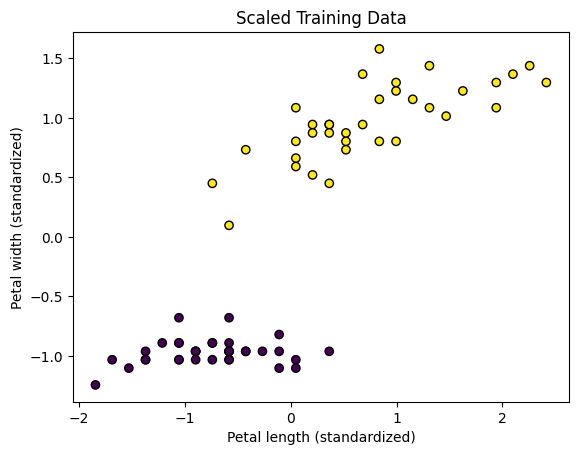

In [36]:
from sklearn.linear_model import LogisticRegression
from plot_decision_boundary import plot_decision_boundary

# Ploting the decision boundary
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, marker='o', edgecolor='k')
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.title('Scaled Training Data')
plt.show()

# Train for the Logistic Regression model with default parameters
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_std, y_train)

# Plot decision boundary function
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Petal length (standardized)')
    plt.ylabel('Petal width (standardized)')
    plt.title('Decision Boundary (Logistic Regression)')
    plt.show()

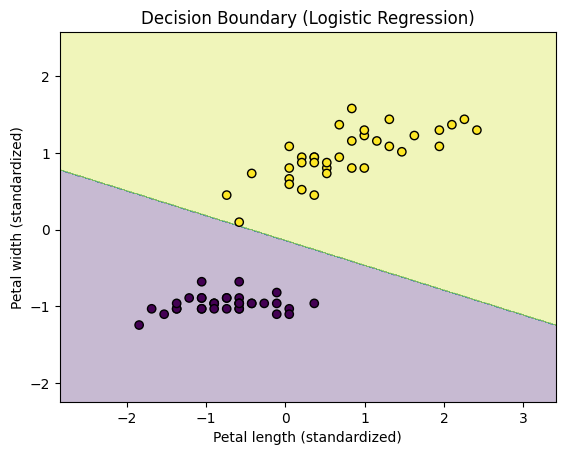

Accuracy on test data: 100.00%


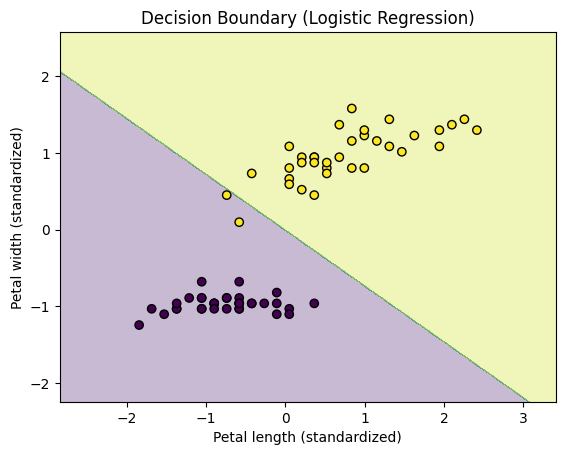

Accuracy with C=0.01: 93.33%


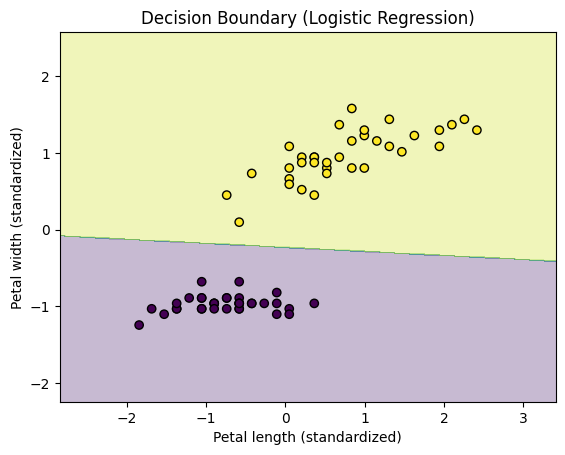

Accuracy with C=100: 100.00%


In [35]:
# Plot the decision boundary
plot_decision_boundary(X_train_std, y_train, model=log_reg)

# Predict and calculate accuracy on the test data
y_pred = log_reg.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')

# Varying regularization parameter C
C_values = [0.01, 100]
for C in C_values:
    log_reg = LogisticRegression(C=C, random_state=42)
    log_reg.fit(X_train_std, y_train)
    plot_decision_boundary(X_train_std, y_train, model=log_reg)
    y_pred = log_reg.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with C={C}: {accuracy * 100:.2f}%')

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

Scaled training data:
 [[-1.34703555 -1.32016847]
 [ 0.41429037  0.65186742]
 [ 0.58474127  0.25746024]
 [-1.29021859 -1.45163753]
 [ 0.13020555  0.12599118]
 [ 0.6983752   0.91480554]
 [ 0.24383948  0.12599118]
 [ 0.75519216  0.3889293 ]
 [ 1.32336182  1.44068178]
 [ 1.66426361  1.30921272]
 [ 1.60744665  1.17774366]
 [ 0.41429037  0.3889293 ]
 [-0.15387928 -0.268416  ]
 [ 0.18702251 -0.268416  ]
 [ 0.13020555 -0.00547788]
 [-1.23340162 -1.32016847]
 [-1.29021859 -1.18869941]
 [ 1.15291092  0.78333648]
 [ 0.98246003  0.78333648]
 [-1.29021859 -1.05723035]
 [ 0.64155823  0.3889293 ]
 [-1.23340162 -1.32016847]
 [ 1.49381271  1.0462746 ]
 [-1.23340162 -1.32016847]
 [-0.04024535 -0.268416  ]
 [ 1.03927699  0.78333648]
 [ 0.8688261   0.91480554]
 [-1.23340162 -1.05723035]
 [ 0.64155823  1.0462746 ]
 [-1.40385252 -1.18869941]
 [-1.29021859 -1.05723035]
 [ 0.13020555  0.12599118]
 [ 0.47110734  0.25746024]
 [-1.29021859 -1.05723035]
 [ 0.92564306  1.17774366]
 [ 0.92564306  1.44068178]
 [-0.

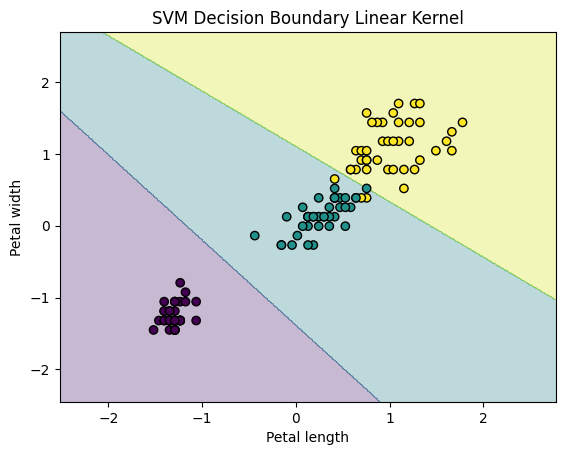

Accuracy on test data: 93.33%


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = iris_data.iloc[:, [2, 3]].values
y = iris_data.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

# Training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print("Scaled training data:\n", X_train_std)
print("\n Scaled test data:\n", X_test_std)

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_std, y_train)

def decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('SVM Decision Boundary Linear Kernel')
    plt.show()
#DECISION BOUNDRY
decision_boundary(X_train_std, y_train, model=svm_linear)
y_pred = svm_linear.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')

# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

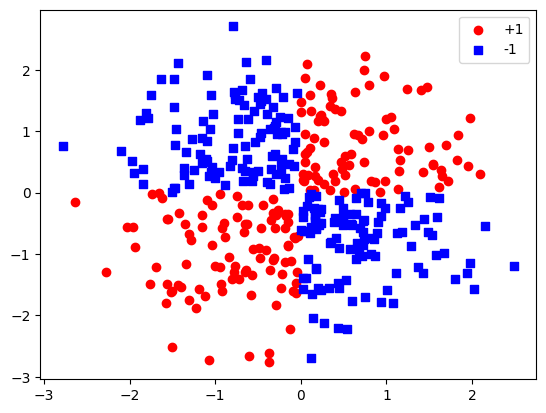

In [39]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

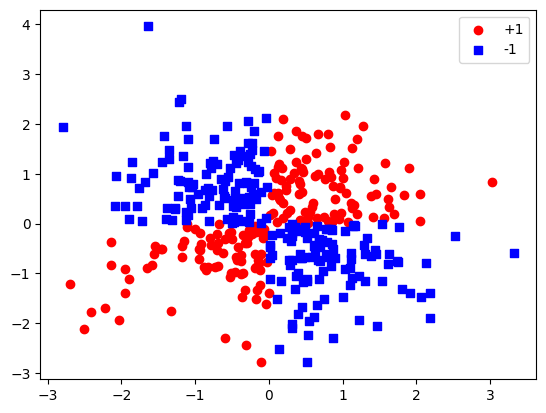

<Figure size 640x480 with 0 Axes>

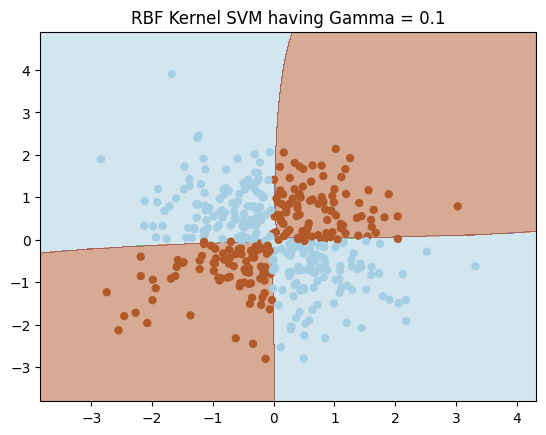

<Figure size 640x480 with 0 Axes>

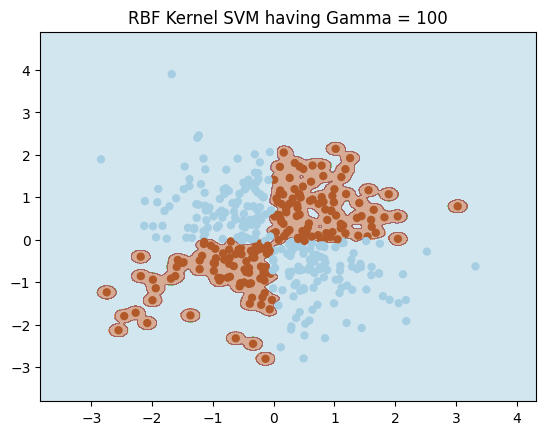

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from plot_decision_boundary import plot_decision_boundary

np.random.seed(1)
X_r = np.random.randn(400, 2)
y_r = np.where([x[0] * x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r == 1, 0], X_r[y_r == 1, 1], c='r', marker='o', label='+1')
plt.scatter(X_r[y_r == -1, 0], X_r[y_r == -1, 1], c='b', marker='s', label='-1')
plt.legend()
plt.show()

sc = StandardScaler()
X_r_std = sc.fit_transform(X_r)

svm_rbf_soft_gamma = SVC(kernel='rbf', gamma=0.1, random_state=1)
svm_rbf_soft_gamma.fit(X_r_std, y_r)

plt.figure()
plot_decision_boundary(X_r_std, y_r, model=svm_rbf_soft_gamma)
plt.title('RBF Kernel SVM having Gamma = 0.1')
plt.show()

svm_rbf_high_gamma = SVC(kernel='rbf', gamma=100, random_state=1)
svm_rbf_high_gamma.fit(X_r_std, y_r)

plt.figure()
plot_decision_boundary(X_r_std, y_r, model=svm_rbf_high_gamma)
plt.title('RBF Kernel SVM having Gamma = 100')
plt.show()
